# Dataset 1 Customer Analysis

## Load Data and Display Basic Properties

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print( "Datset dimensions : ", data.shape)

Datset dimensions :  (2240, 29)


About the dataset :

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- arital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# Fill null value in income column with median income
print(data['Income'].dtypes)
data['Income'] = data['Income'].fillna(data['Income'].median())
data.isna().sum()

float64


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Distribution for Categorical Data

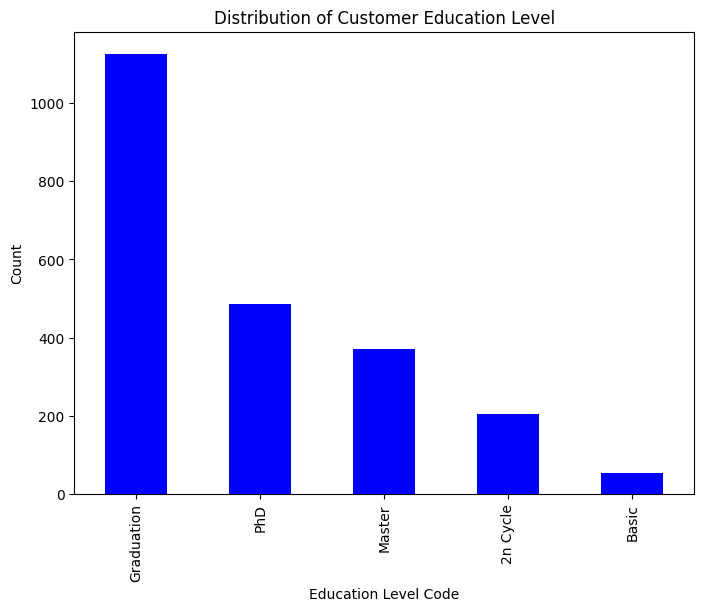

In [14]:

education_level_distribution = data['Education'].value_counts()
plt.figure(figsize=(8, 6))
education_level_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Customer Education Level')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

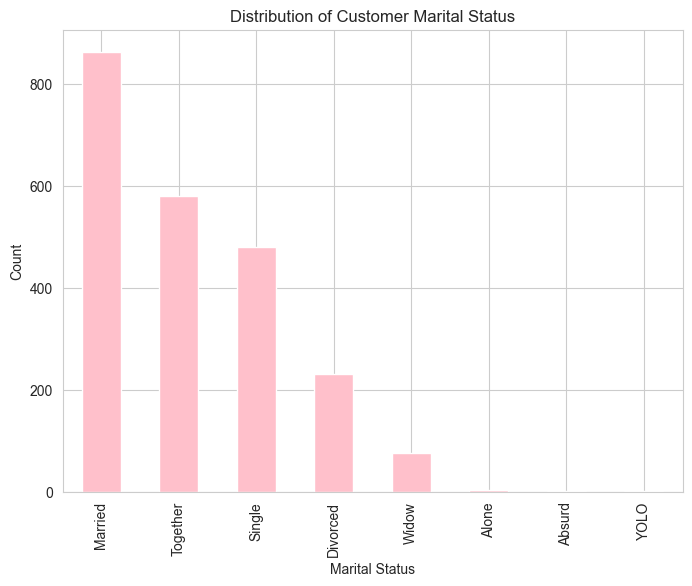

In [100]:
marital_status_distribution = data['Marital_Status'].value_counts()
plt.figure(figsize=(8, 6))
marital_status_distribution.plot(kind='bar', color='pink')
plt.title('Distribution of Customer Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Correlation Matrix for Numerical Values

In [16]:
# column ID and dt_customer (when customer enrolled) are unrelated to customer segmentation clustering model
# drop unrelated columns 
data = data.drop(columns = ['ID','Dt_Customer'])

In [17]:
# Convert Year_Birth to Age (as of the year when dataset was updated)
Age = []
CurrentYear= 2021
for item in data["Year_Birth"]:
    Age.append(CurrentYear-item)

# Add the new column to dataset
data.insert(0,'Age',Age)

dataset = data.drop(columns="Year_Birth")

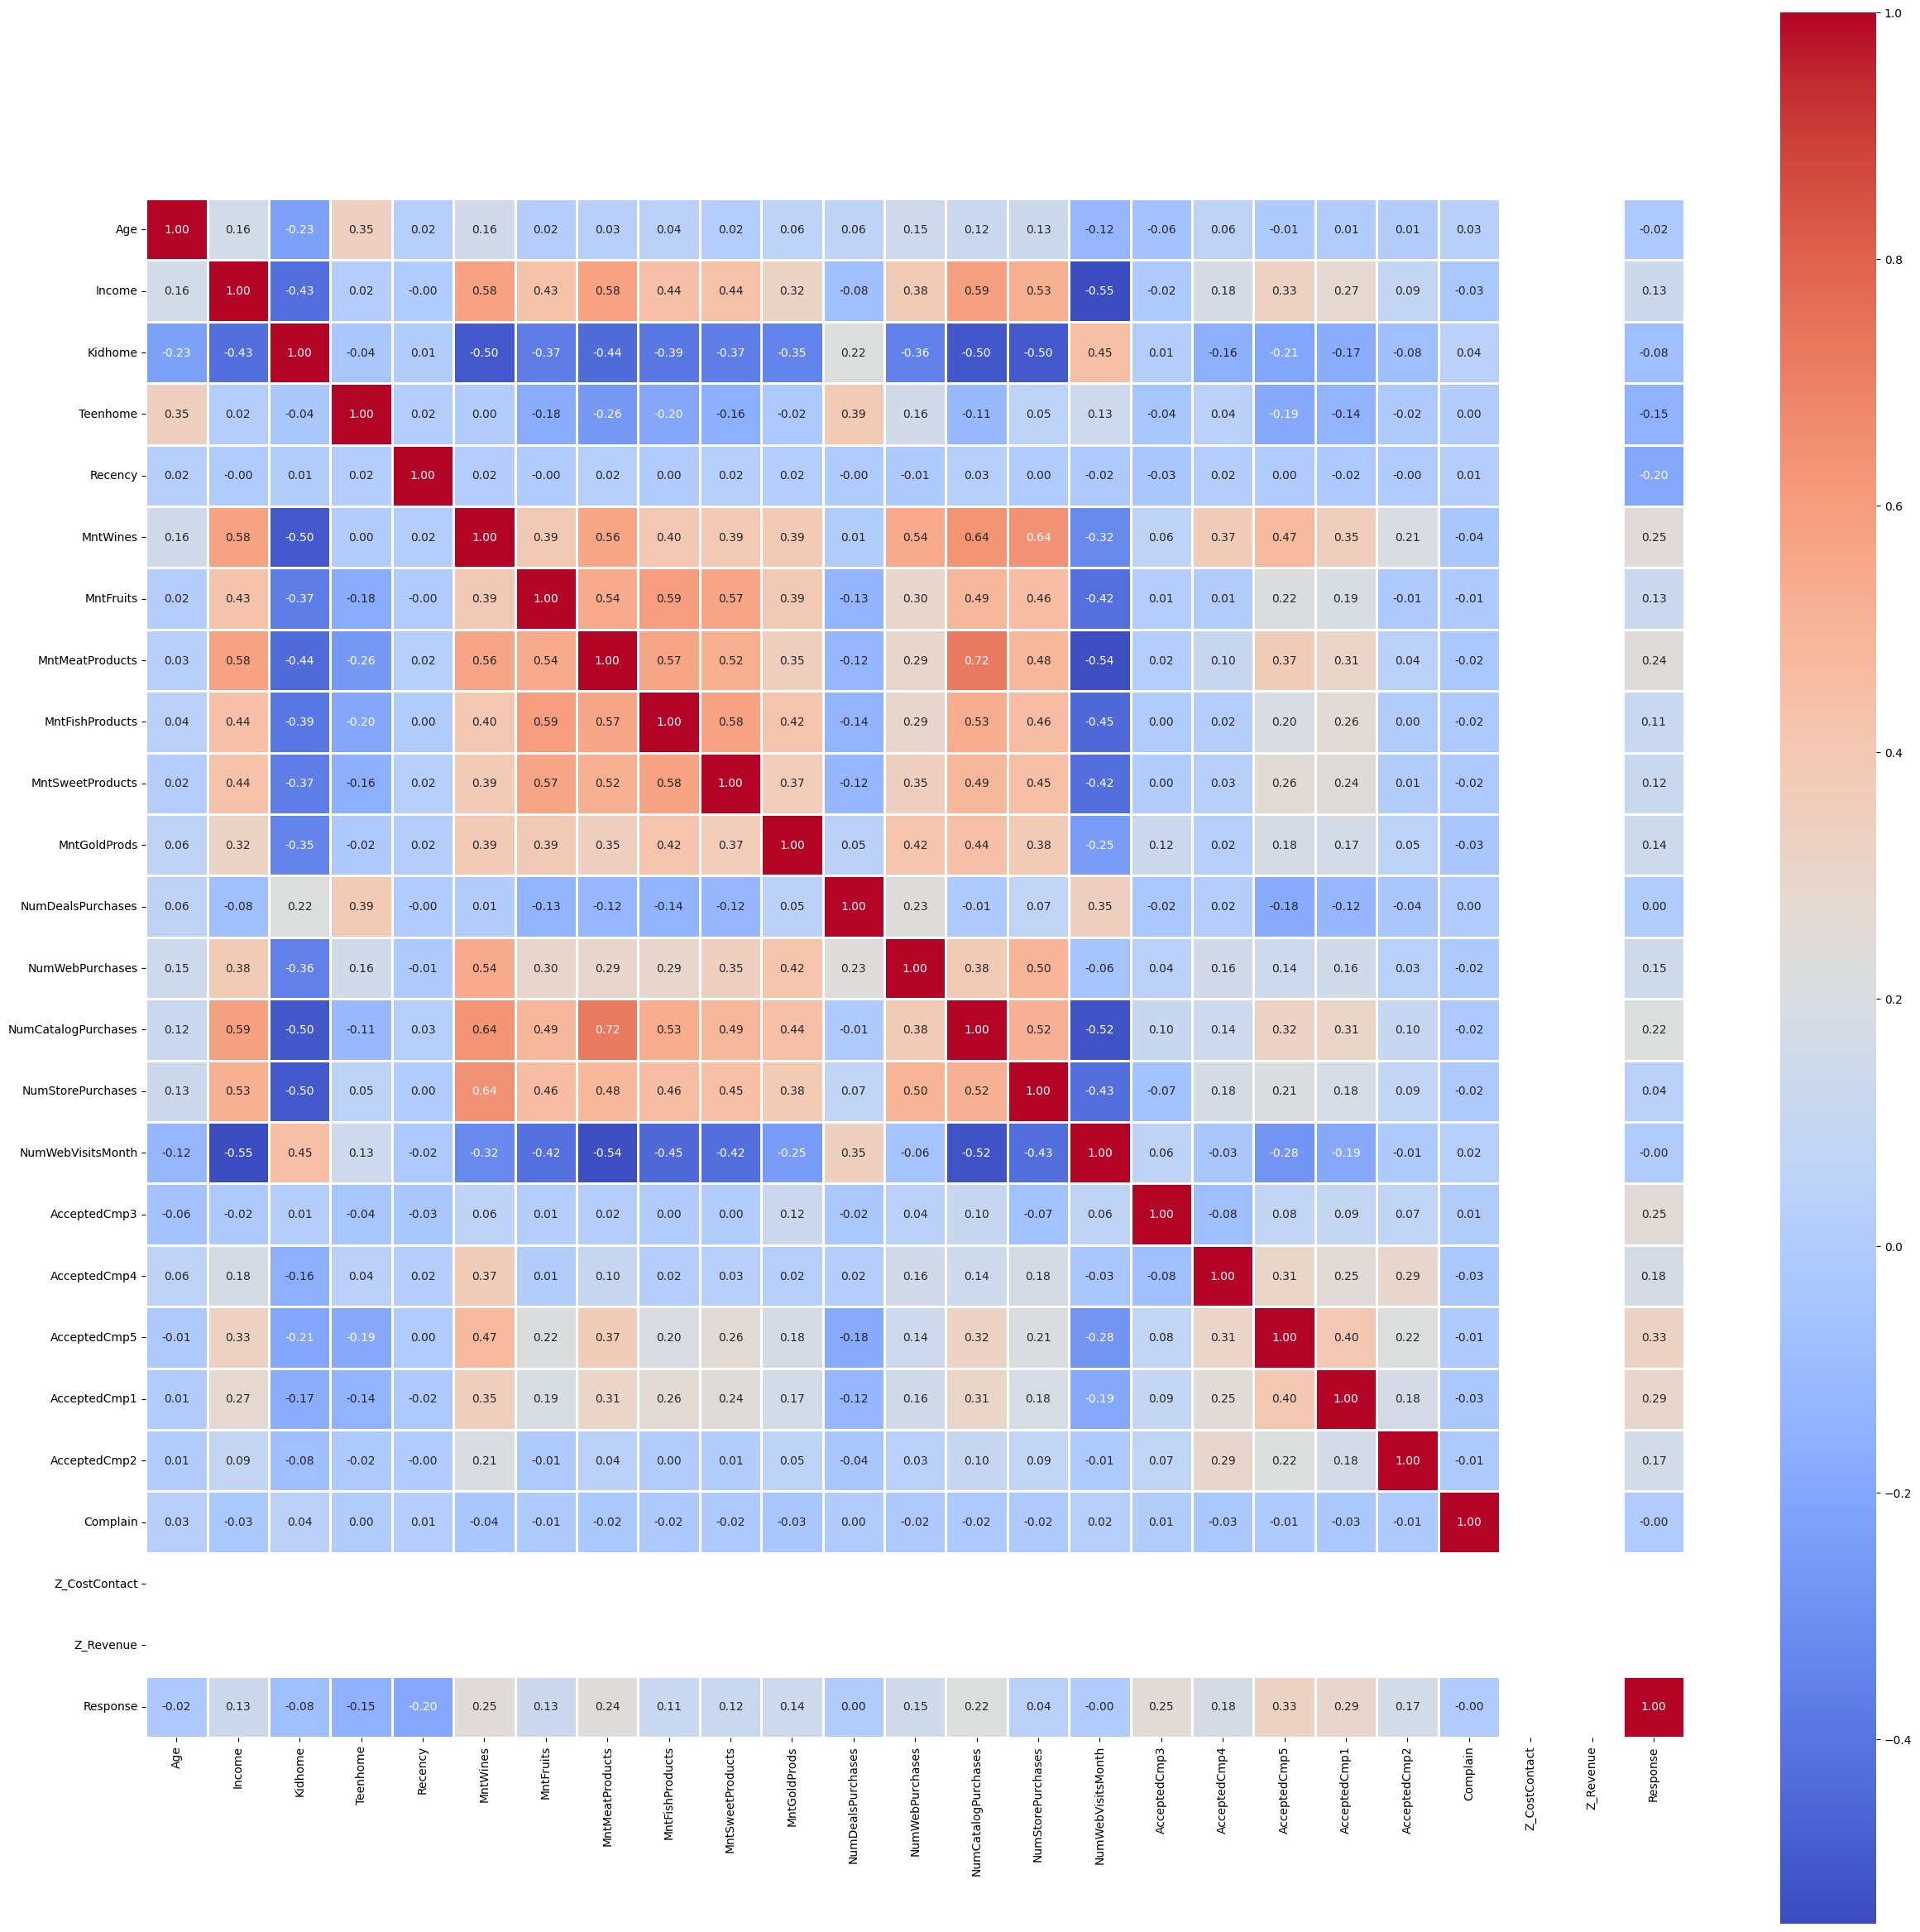

In [21]:
# Display Correlations between numerical columns

correlation_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(30, 30))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linecolor='white', linewidths=1)


plt.show()

### Univariate Analysis on Numerical Values

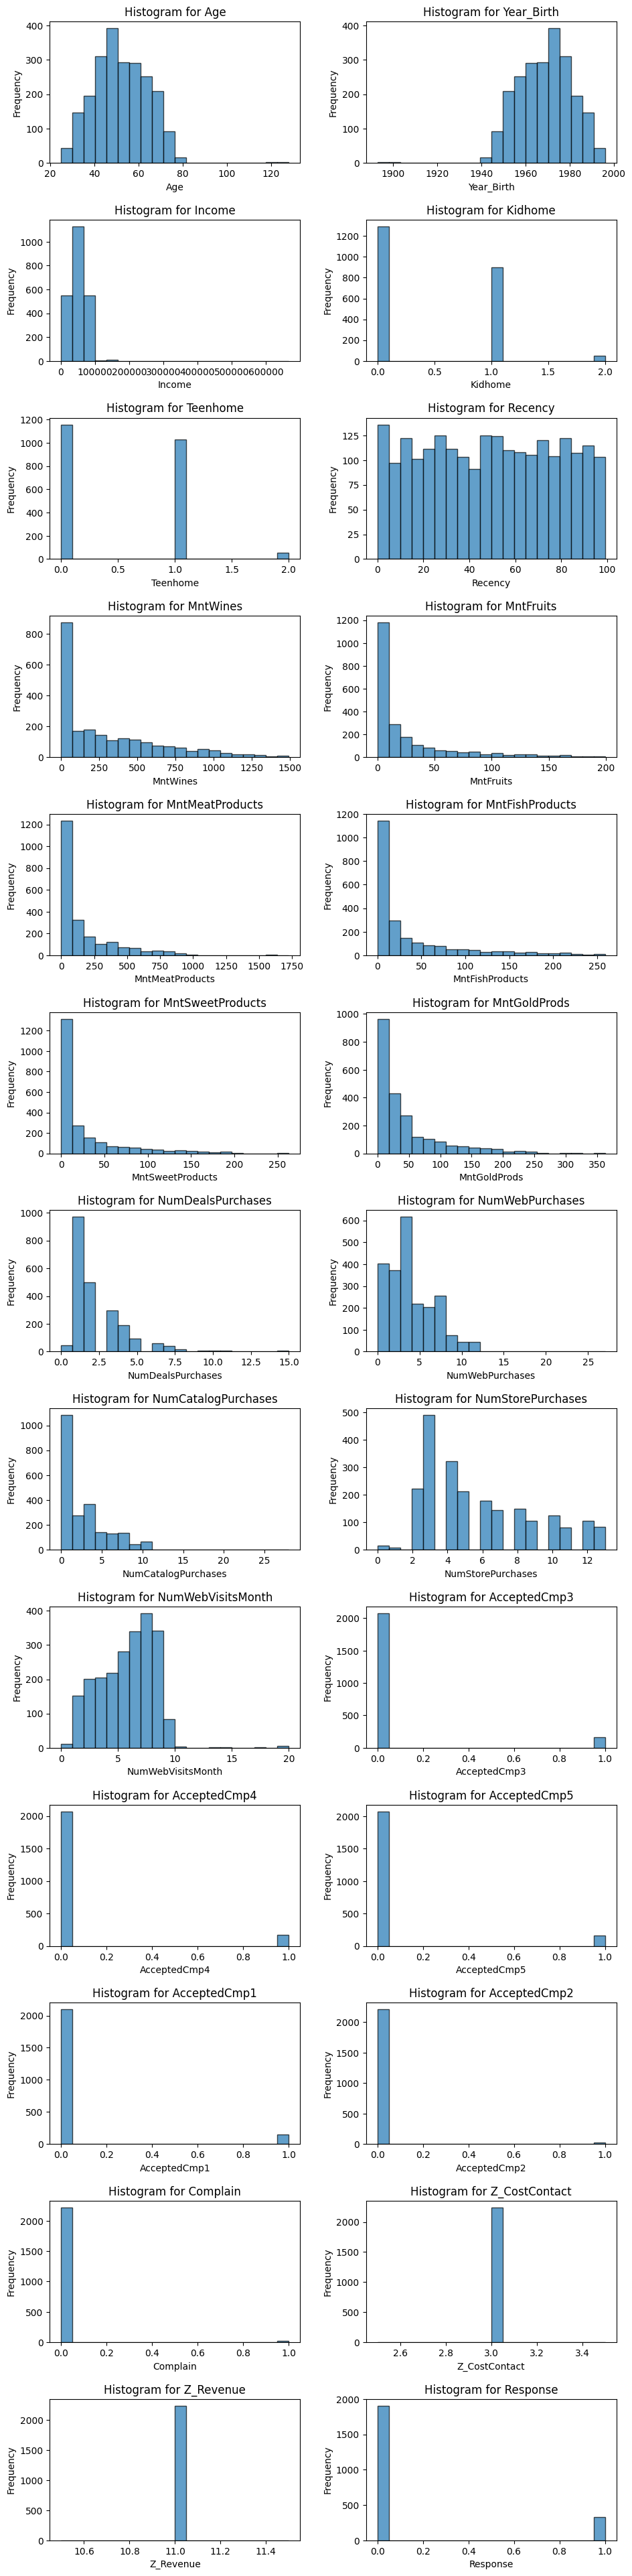

In [35]:
numeric_cols = data.select_dtypes(include=['number']).columns


num_cols = 2  
num_rows = (len(numeric_cols) + 1) // num_cols  


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 3))
fig.tight_layout(pad=4.0)


axes = axes.flatten()


for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col].dropna(), bins=20, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


### Basic EDA on customer spending behavior based on educational level.

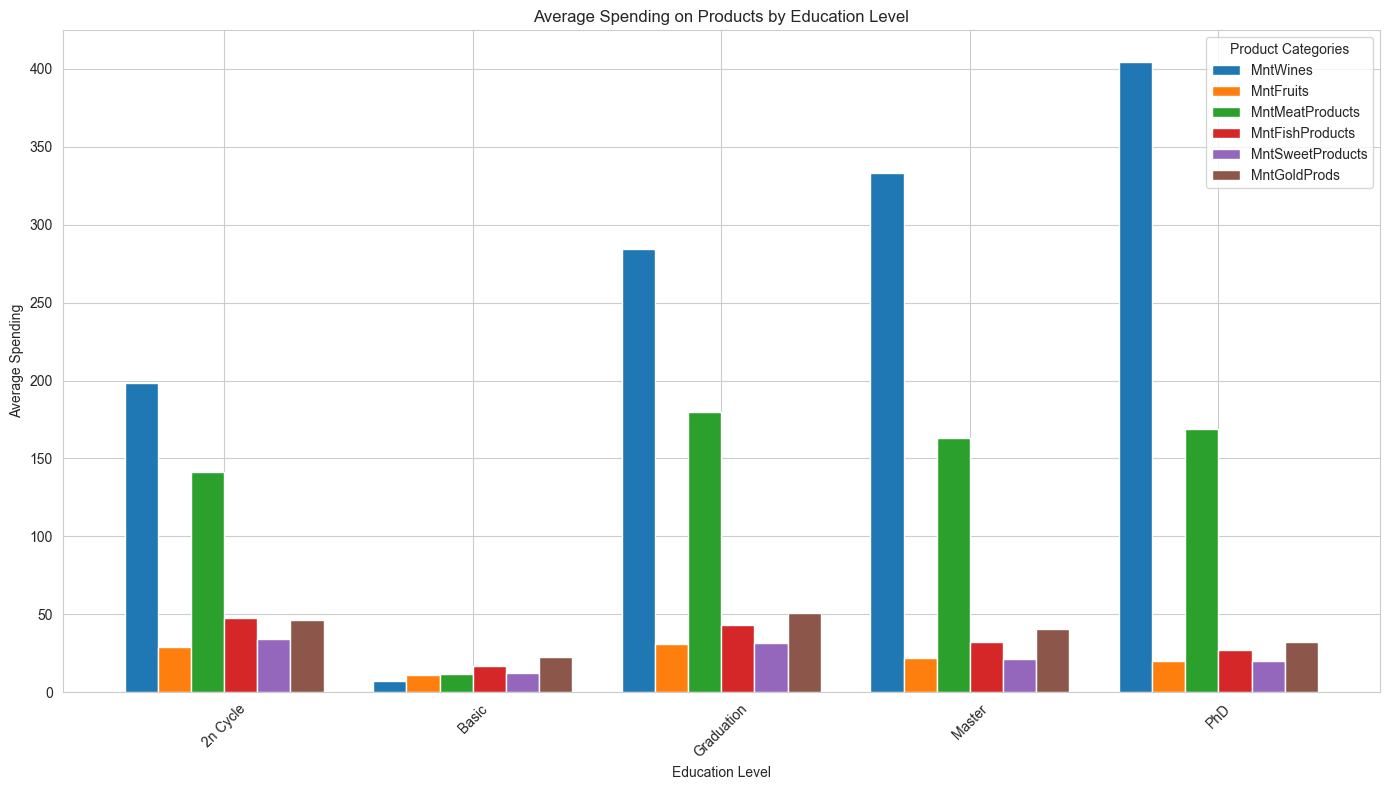

In [39]:
# Group by Education and calculate mean spending on product categories
education_spending_means = data.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

sns.set_style("whitegrid")


education_spending_means.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Spending on Products by Education Level')
plt.ylabel('Average Spending')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.tight_layout()
plt.show()




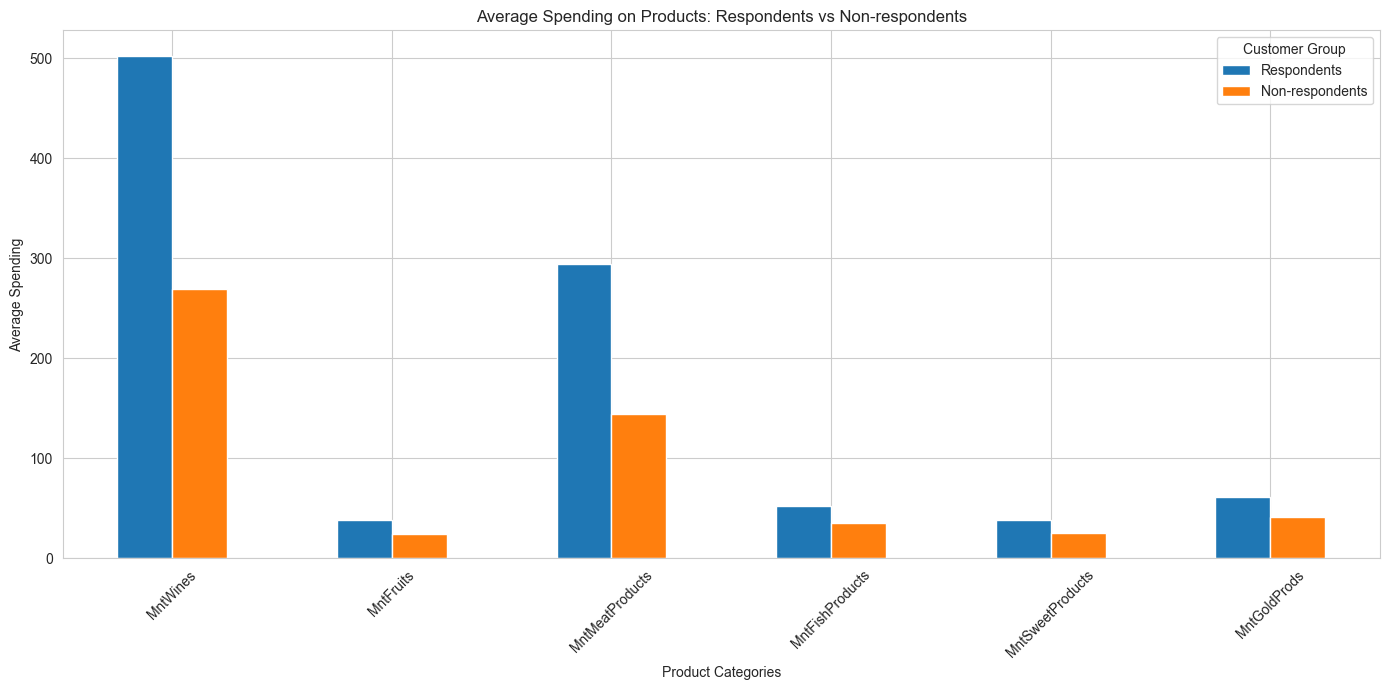

In [40]:

respondents = data[data['Response'] == 1]
non_respondents = data[data['Response'] == 0]

# Calculate mean spending on product categories for both groups
respondent_means = respondents[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
non_respondent_means = non_respondents[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()


mean_spending_comparison = pd.DataFrame({'Respondents': respondent_means, 'Non-respondents': non_respondent_means})


mean_spending_comparison.plot(kind='bar', figsize=(14, 7))
plt.title('Average Spending on Products: Respondents vs Non-respondents')
plt.ylabel('Average Spending')
plt.xlabel('Product Categories')
plt.xticks(rotation=45)
plt.legend(title='Customer Group')
plt.tight_layout()
plt.show()


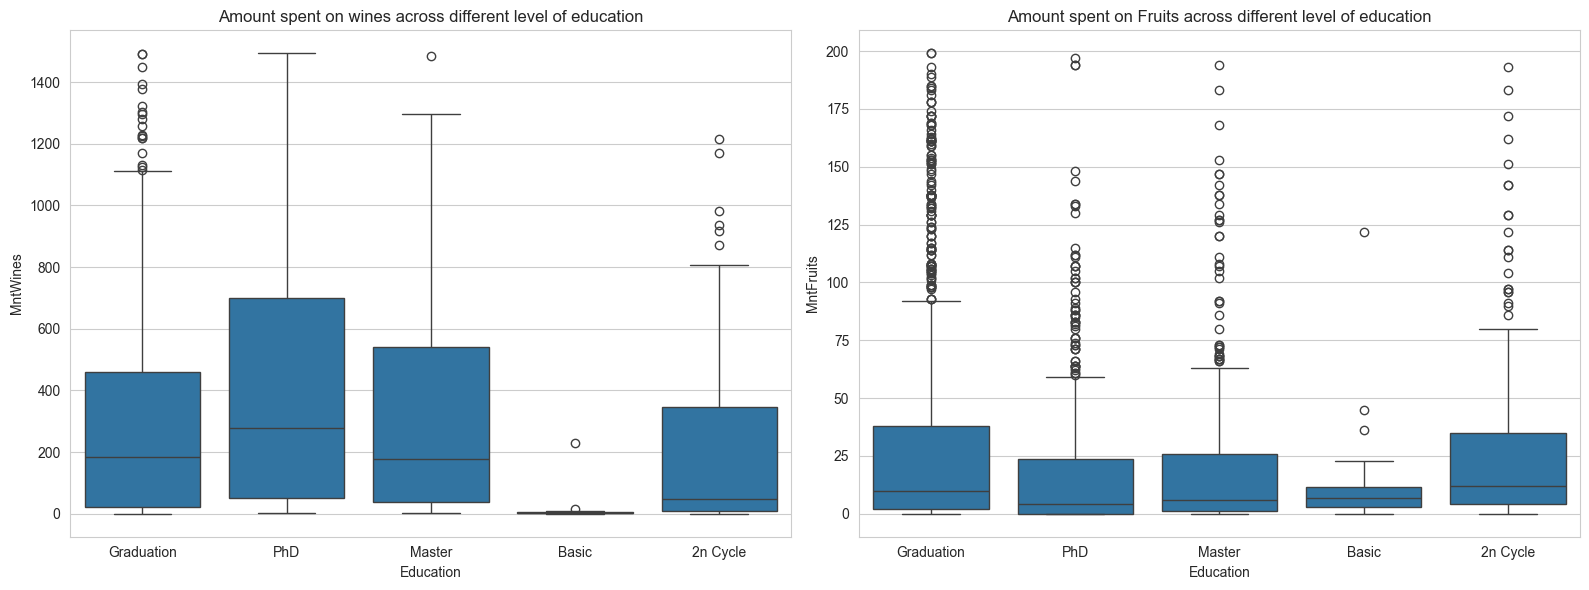

In [42]:
# Boxplot for wine (unhealthy) and fruits (healthy) spending for customer in education groups,
# Wine
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data,x="Education",y="MntWines")
plt.title("Amount spent on wines across different level of education")
#Fruits
plt.subplot(1,2,2)
sns.boxplot(data,x="Education",y="MntFruits")
plt.title("Amount spent on Fruits across different level of education")
plt.tight_layout()
plt.show()